In [16]:
import numpy as np
from tensorflow.python import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
from tensorflow.python.keras import losses
from tensorflow.python.keras import optimizers
from tensorflow.python.keras import activations
from tensorflow.python.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Read Data
data = pd.read_csv("YESBANK.NS.csv")
#Display top 10 rows
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-21,18.950001,19.000000,18.000000,18.000000,18.000000,168955038
1,2020-12-22,17.400000,17.600000,17.100000,17.299999,17.299999,284913909
2,2020-12-23,17.500000,17.850000,17.049999,17.600000,17.600000,216066991
3,2020-12-24,17.900000,18.000000,17.299999,17.549999,17.549999,124638448
4,2020-12-28,17.799999,18.200001,17.549999,17.799999,17.799999,149082382


In [18]:
#we deletd the columns date and close because we are predicting the closing price
ds = data.drop(['Date', 'Close'], axis=1).fillna(0).to_numpy().reshape((-1, 5, 1))
#fill = it wil remove all the null values
#numpy = it will convert the pandas data frame  to numpy ND array
# reshape = used to increase the dimension by one so that it can be used conv 1D layer
ds = np.hstack([ds, np.zeros((ds.shape[0], 3,1))]).astype(np.float32)
#hstack = used to append 3 column to zeros so that data shape is compliant to auto encoder
# as type = used to convert all int values to float
ds = ds - np.mean(ds, axis=0, keepdims=True)
# normal mean
ds[:, 4, :] /= 214860840
# normalize the normal column of volume

In [19]:
ds.shape

(496, 8, 1)

In [20]:
#encoder model
enc = models.Sequential([
    layers.InputLayer((8, 1)),
    layers.Conv1D(filters=3, kernel_size=3, padding='same'),
    layers.MaxPool1D(pool_size=2),
    layers.Conv1D(filters=3, kernel_size=3, padding='same'),
    layers.MaxPool1D(pool_size=2),
    layers.Conv1D(filters=3, kernel_size=3, padding='same'),
    layers.MaxPool1D(pool_size=2),
    layers.Conv1D(filters=1, kernel_size=3, padding='same'),
])
enc.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 8, 3)              12        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 4, 3)              0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 4, 3)              30        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 3)              0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 2, 3)              30        
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 1, 3)              0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1, 1)             

In [21]:

#decoder part
dec = models.Sequential([
    layers.InputLayer((1, 1)),
    layers.Conv1D(filters=3, kernel_size=3, padding='same'),
    layers.UpSampling1D(size=2),
    layers.Conv1D(filters=3, kernel_size=3, padding='same'),
    layers.UpSampling1D(size=2),
    layers.Conv1D(filters=3, kernel_size=3, padding='same'),
    layers.UpSampling1D(size=2),
    layers.Conv1D(filters=1, kernel_size=3, padding='same'),
])
dec.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 1, 3)              12        
_________________________________________________________________
up_sampling1d_5 (UpSampling1 (None, 2, 3)              0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 2, 3)              30        
_________________________________________________________________
up_sampling1d_6 (UpSampling1 (None, 4, 3)              0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 4, 3)              30        
_________________________________________________________________
up_sampling1d_7 (UpSampling1 (None, 8, 3)              0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 8, 1)             

In [68]:
#this is a model which combines the encoder and decoder so that we can train the encoder
encoder_trainer = models.Sequential([
    layers.InputLayer((8, 1)),
    enc,
    dec
])
encoder_trainer.compile(
    # optimizer=optimizers.rmsprop_v2.RMSprop(learning_rate=0.00001),
    optimizer=optimizers.adam_v2.Adam(learning_rate=0.000000001),
    loss=losses.MAPE,
    metrics=['mse', 'mape', 'mae']
)

In [69]:
enc.trainable = True
h = encoder_trainer.fit(
    x=ds, y=ds,
    epochs=100
)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 62.7982 - mse: 1.9574 - mape: 62.7982 - mae: 0.8382
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 62.6325 - mse: 1.9574 - mape: 62.6325 - mae: 0.8382
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 62.6219 - mse: 1.9574 - mape: 62.6219 - mae: 0.8382
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 62.5795 - mse: 1.9574 - mape: 62.5795 - mae: 0.8382
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 62.6064 - mse: 1.9574 - mape: 62.6064 - mae: 0.8382
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 62.6304 - mse: 1.9574 - mape: 62.6304 - mae: 0.8382
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 62.6284 - mse: 1.9574 - mape: 62.6284 - mae: 0.8382
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 62.6273 - mse: 1.9574 - mape: 62.6273 - mae: 0.8382


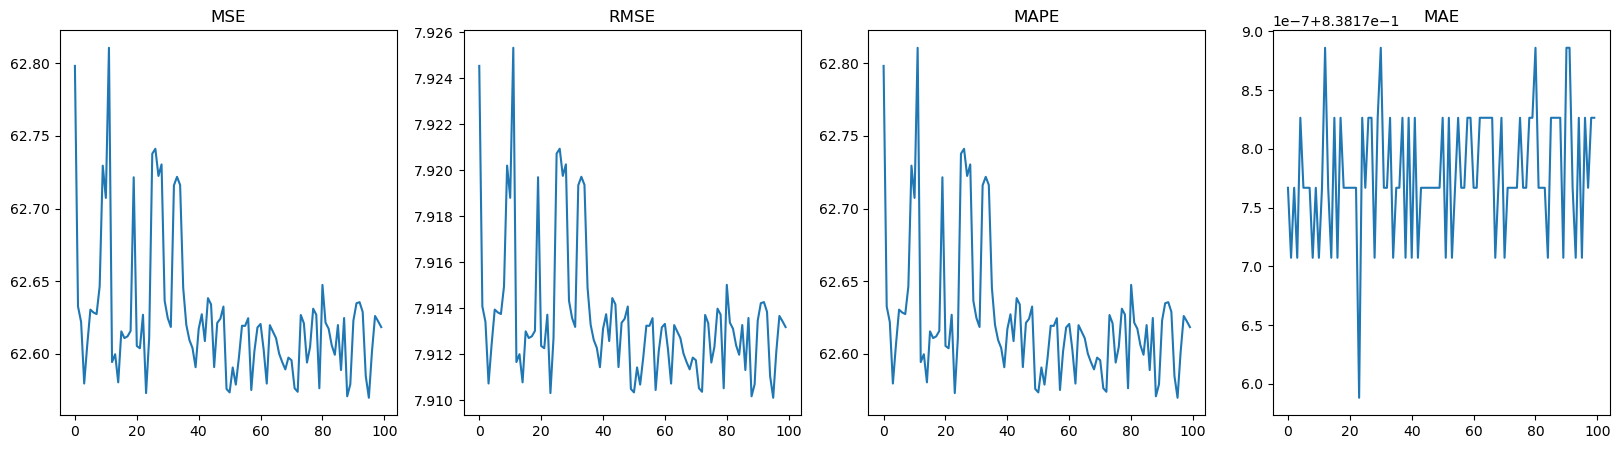

In [70]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].plot(h.history['loss'])
axs[0].set_title('MSE')
axs[1].plot(np.sqrt(h.history['loss']))
axs[1].set_title('RMSE')
axs[2].plot(h.history['mape'])
axs[2].set_title('MAPE')
axs[3].plot(h.history['mae'])
axs[3].set_title('MAE')
plt.show()

In [25]:

#predictor part
pre = models.Sequential([
    layers.InputLayer((1, 1)),
    layers.Conv1D(filters=3, kernel_size=3, padding='same'),
    layers.UpSampling1D(size=2),
    layers.Conv1D(filters=3, kernel_size=3, padding='same'),
    layers.UpSampling1D(size=2),
    layers.Conv1D(filters=3, kernel_size=3, padding='same'),
    layers.MaxPool1D(pool_size=2),
    layers.Conv1D(filters=1, kernel_size=3, padding='same'),
    layers.MaxPool1D(pool_size=2),
])
pre.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 1, 3)              12        
_________________________________________________________________
up_sampling1d_8 (UpSampling1 (None, 2, 3)              0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 2, 3)              30        
_________________________________________________________________
up_sampling1d_9 (UpSampling1 (None, 4, 3)              0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 4, 3)              30        
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 2, 3)              0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 2, 1)             

In [26]:
yd = data['Close'].fillna(0).to_numpy().reshape((-1, 1, 1))
yd.shape

(496, 1, 1)

In [84]:
#this is a model which combines the encoder and predictor so that we can train the predictor
predictor_trainer = models.Sequential([
    layers.InputLayer((8, 1)),
    enc,
    pre
])
predictor_trainer.compile(
    optimizer=optimizers.rmsprop_v2.RMSprop(learning_rate=0.000001),
    loss=losses.MAPE,
    metrics=['mse', 'mape', 'mae']
)

In [85]:
enc.trainable = False# so that our encoder part will not change at the time of prdicting
h = predictor_trainer.fit(
    x=ds, y=yd,
    epochs=100
)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.6300 - mse: 0.2631 - mape: 1.6300 - mae: 0.2296
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 1.6299 - mse: 0.2631 - mape: 1.6299 - mae: 0.2296
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 1.6299 - mse: 0.2631 - mape: 1.6299 - mae: 0.2296
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 1.6299 - mse: 0.2631 - mape: 1.6299 - mae: 0.2296
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 1.6299 - mse: 0.2631 - mape: 1.6299 - mae: 0.2296
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 1.6299 - mse: 0.2631 - mape: 1.6299 - mae: 0.2296
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 1.6299 - mse: 0.2631 - mape: 1.6299 - mae: 0.2296
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 1.6299 - mse: 0.2632 - mape: 1.6299 - mae: 0.2296
Epoch 9/100
16/1

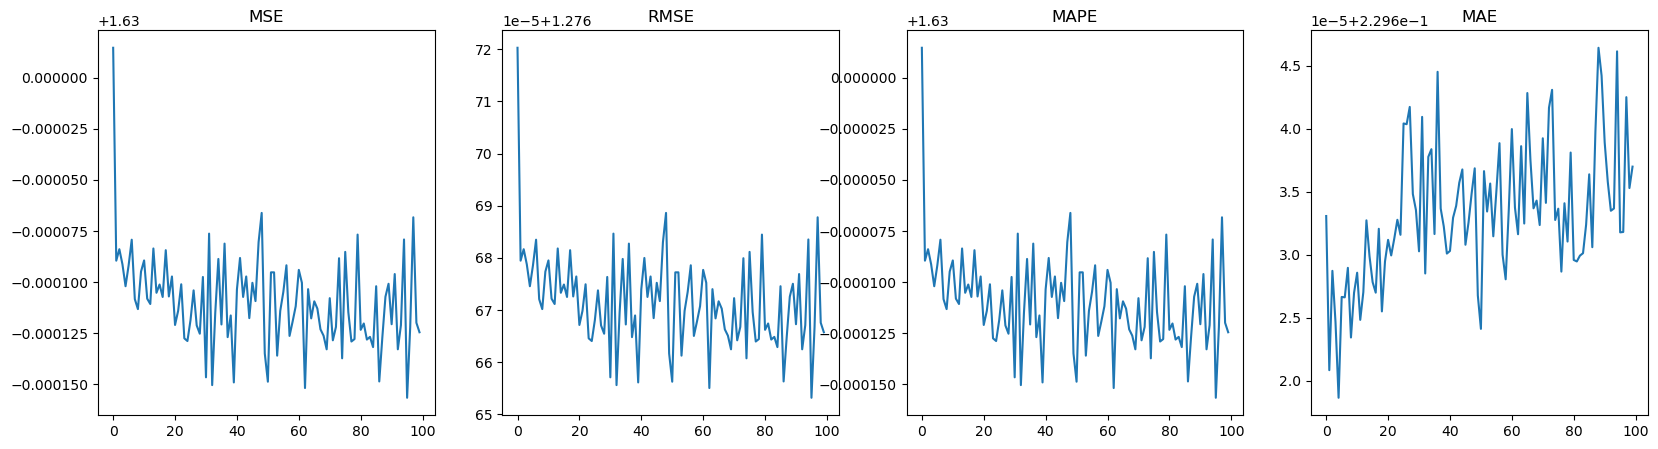

In [86]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].plot(h.history['loss'])
axs[0].set_title('MSE')
axs[1].plot(np.sqrt(h.history['loss']))
axs[1].set_title('RMSE')
axs[2].plot(h.history['mape'])
axs[2].set_title('MAPE')
axs[3].plot(h.history['mae'])
axs[3].set_title('MAE')
plt.show()

In [87]:
enc.save('AeEncoder')
dec.save('AeDecoder')
pre.save('AePredictor')

INFO:tensorflow:Assets written to: AeEncoder/assets
INFO:tensorflow:Assets written to: AeDecoder/assets
INFO:tensorflow:Assets written to: AePredictor/assets


In [11]:
enc = models.load_model('AeEncoder')
dec = models.load_model('AeDecoder')
pre = models.load_model('AePredictor')

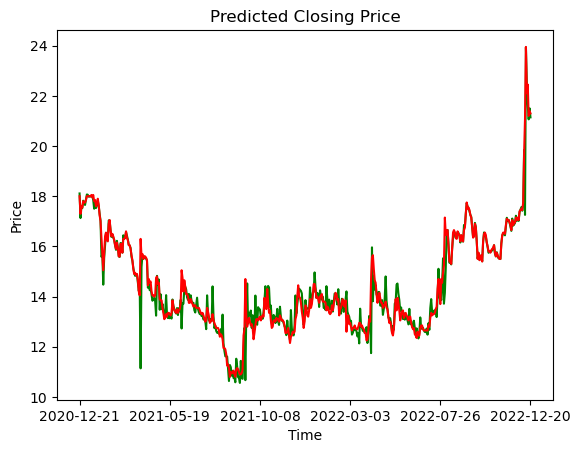

In [88]:
pred = predictor_trainer.predict(ds)[:, 0, 0]
plt.plot(pred, color=(0, 0.5, 0))
plt.plot(data['Close'], color=(1, 0, 0))
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Predicted Closing Price')
plt.xticks(range(0, len(pred), 496//5), data['Date'][0:496:496//5])
plt.show()
np.save('AE_ELM', pred)